# 111大專院校各校科系別學生數 資料集處理 (LATIA 112-1)

TA : TAHRD 113 高奕弘

In [2]:
import pandas as pds
import matplotlib.pyplot as plt
import random

plt.rc("font", family="Microsoft JhengHei")  # 讓 plt 可以顯示中文

data = pds.read_csv("111_students.csv", encoding="utf-8")
data.isnull().sum().sum()  # 檢查空值數量

0

In [3]:
data

,學年度,學校代碼,學校名稱,科系代碼,科系名稱,日間∕進修別,等級別,總計,男生計,女生計,...,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別
0,111,1044,聖約翰科技大學,4131005,企業管理系,D 日,B 四技,10,4,6,...,0,0,0,0,0,0,2,0,01 新北市,2 技職
1,111,2,國立清華大學,7151134,AI智慧製造與工業物聯網產業碩士專班,D 日,M 碩士,3,3,0,...,0,0,0,0,0,0,0,0,18 新竹市,1 一般
2,111,2,國立清華大學,7151141,AI智慧製造與智慧物聯網產業碩士專班,D 日,M 碩士,6,5,1,...,0,0,0,0,0,0,0,0,18 新竹市,1 一般
3,111,1048,亞洲大學,4131055,EMBA高階經理碩士在職學位學程,N 職,M 碩士,11,9,2,...,0,0,0,0,0,0,0,0,06 臺中市,1 一般
4,111,52,國立屏東大學,1115073,STEM教育國際碩士學位學程,D 日,M 碩士,4,0,4,...,0,0,0,0,0,0,0,0,13 屏東縣,1 一般
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,111,1023,南臺科技大學,9211062,高齡福祉服務系,N 修,C 二技,50,6,44,...,0,0,0,0,0,0,1,2,11 臺南市,2 技職
9771,111,1195,馬偕醫學院,7193006,高齡福祉科技研究所,D 日,M 碩士,16,6,10,...,0,0,0,0,0,0,0,0,01 新北市,1 一般
9772,111,1025,嘉南藥理大學,9211047,高齡福祉養生管理系,D 日,B 四技,114,28,86,...,0,0,0,0,0,0,2,2,11 臺南市,2 技職
9773,111,1025,嘉南藥理大學,9211047,高齡福祉養生管理系,N 修,C 二技,62,19,43,...,0,0,0,0,0,0,0,0,11 臺南市,2 技職


## 資料總覽

### 本資料總共蒐集多少大專院校，並依國/私立、縣市別區分

In [26]:
school_SorI = []

for i in data['學校名稱']:
    if ('國立' in i) or ('市立' in i):
        school_SorI.append('國立')
    else:
        school_SorI.append('私立')

data['公私立'] = school_SorI # 將 Dataframe 新增「公私立」column

### 大專院校總數以及公立和私立分別有幾所

目前有 148 間大專院校
其中國立學校有47間,私立有101間


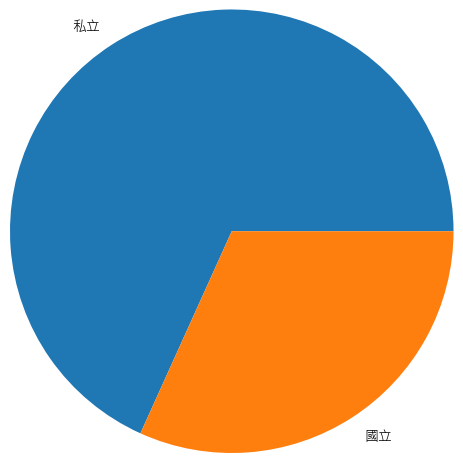

In [5]:
data_buf = data.drop_duplicates(subset=['學校名稱'])

school_name  = data_buf['學校名稱'].unique()
school_count = data_buf['公私立'].value_counts()
school_SorI  = data_buf['公私立'].unique()
school_num   = school_name.__len__()
print('目前有'
      ,school_num
      ,'間大專院校')
print(f'其中國立學校有{school_count["國立"]}間,私立有{school_count["私立"]}間')
plt.pie(school_count,radius=1.5,labels = school_SorI)
plt.show()

### 各縣市分別有幾所大專院校

In [6]:
city_list = []
for i in data['縣市名稱']:
    city_list.append(i[3:])
data['縣市名稱'] = city_list

In [7]:
city_to_area = {'臺北市':'北部', '新北市':'北部', '基隆市':'北部', 
                '新竹市':'北部', '桃園市':'北部', '新竹縣':'北部', 
                '宜蘭縣':'北部', '臺中市':'中部', '苗栗縣':'中部', 
                '彰化縣':'中部', '南投縣':'中部', '雲林縣':'中部', 
                '高雄市':'南部', '臺南市':'南部', '嘉義市':'南部', 
                '嘉義縣':'南部', '屏東縣':'南部', '澎湖縣':'南部', 
                '花蓮縣':'東部', '臺東縣':'東部', '金門縣':'福建省'
                }
data['區域'] = data['縣市名稱'].map(city_to_area)

data_buf = data.drop_duplicates(subset=['縣市名稱','學校名稱','區域'])
school_city = data_buf['縣市名稱'].value_counts()

city_list = data_buf['縣市名稱'].unique()
# area_list.sort(area_list['區域'])
print(f"本資料集共收集了 {school_num} 所學校，其中：")

for city in city_list:
    print(f"{city} 有 {school_city[city]} 所大專院校")

本資料集共收集了 148 所學校，其中：
新北市 有 20 所大專院校
新竹市 有 5 所大專院校
臺中市 有 17 所大專院校
屏東縣 有 5 所大專院校
高雄市 有 16 所大專院校
臺北市 有 24 所大專院校
臺南市 有 14 所大專院校
桃園市 有 12 所大專院校
嘉義縣 有 4 所大專院校
嘉義市 有 2 所大專院校
宜蘭縣 有 3 所大專院校
花蓮縣 有 4 所大專院校
南投縣 有 2 所大專院校
彰化縣 有 5 所大專院校
苗栗縣 有 3 所大專院校
臺東縣 有 2 所大專院校
金門縣 有 1 所大專院校
新竹縣 有 2 所大專院校
雲林縣 有 3 所大專院校
基隆市 有 3 所大專院校
澎湖縣 有 1 所大專院校


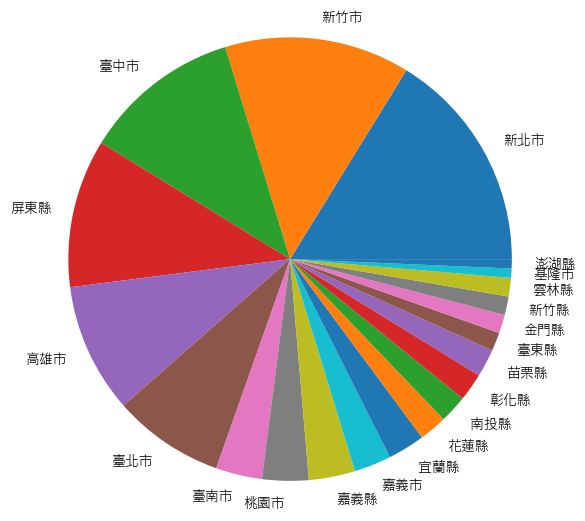

In [11]:
plt.pie(school_city,
        radius=1.5,
        labels = city_list)
plt.show()

### 各學制占比

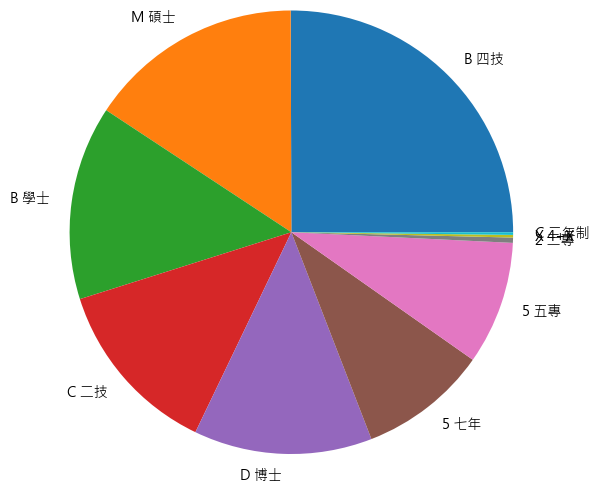

In [28]:
data_buf = data.drop_duplicates(subset=['學校名稱','等級別'])
grade_count = data_buf['等級別'].value_counts()
grade_name = data_buf['等級別'].unique()

plt.pie(grade_count,
        radius=1.5,
        labels = grade_name)
plt.show()

### 各體系比例

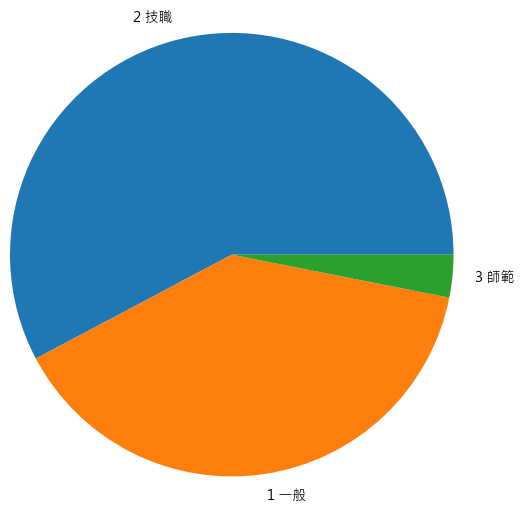

In [50]:
data_buf = data.drop_duplicates(subset=['學校名稱','體系別'])
grade_count = data_buf['體系別'].value_counts()
grade_name = data_buf['體系別'].unique()

plt.pie(grade_count,
        radius=1.5,
        labels = grade_name)
plt.show()

## 各區學校數量總額

### 各區學校數量

In [ ]:
data_buf = data.drop_duplicates(subset=['縣市名稱','學校名稱','區域'])

In [24]:
school_area = data_buf['區域'].value_counts()
area_list = data_buf['區域'].unique()
for area in area_list:
    print(f"{area} 有 {school_area[area]} 所大專院校")

北部 有 69 所大專院校
中部 有 30 所大專院校
南部 有 42 所大專院校
東部 有 6 所大專院校
福建省 有 1 所大專院校


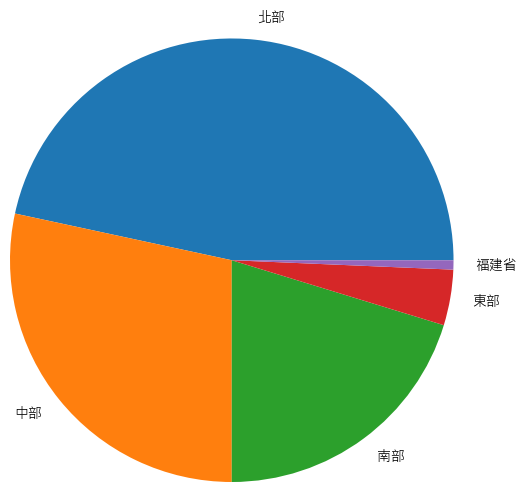

In [25]:
plt.pie(school_area,
        radius=1.5,
        labels = area_list)
plt.show()

#### 整體男女比

全台有 575913 位女學生
全台有 564176 位男學生
學生總數為 1140089 位


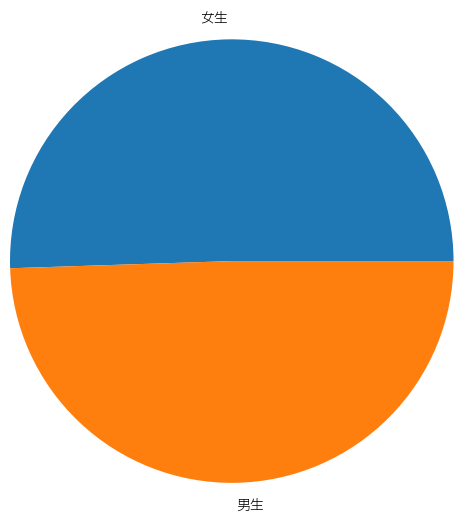

In [47]:
girl_num = sum(data['女生計'])
boy_num = sum(data['男生計'])

student_sum = [girl_num, boy_num]
label_student = ["女生","男生"]

print(f"全台有",girl_num,"位女學生")
print(f"全台有",boy_num,"位男學生")
print(f"學生總數為",boy_num+girl_num,"位")

plt.pie(student_sum,
        radius=1.5,
        labels = label_student)
plt.show()

In [58]:
count = {}

def create_count_dict(data, count): # 建立多層 dict 結構來儲存各校在學與延修生的男女生數
    data_buf = data.drop_duplicates('學校代碼')
    for i in data_buf['學校名稱']:
        count[i] = {}
        count[i]['在學生'] = {}
        count[i]['在學生']['男生數'] = 0
        count[i]['在學生']['女生數'] = 0

def count_every_schools_data(data):
    for j in range(len(data)):
        count[data.iloc[j,2]]['在學生']['男生數'] += (int(data.iloc[j,8]) )
        count[data.iloc[j,2]]['在學生']['女生數'] += (int(data.iloc[j,9]) )

create_count_dict(data, count)
count_every_schools_data(data)

### 國立大學在學生男女比

國立大學在學生男女比：≑ 120.29


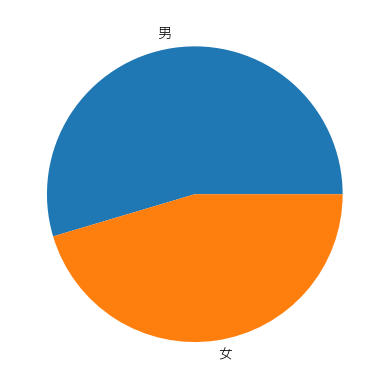

In [64]:
public_current_male = 0
public_current_female = 0


data_buf = data.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(data_buf)):
    if data_buf.loc[i,'公私立'] == '國立':
        public_current_male += count[data_buf.loc[i,'學校名稱']]['在學生']['男生數']
        public_current_female += count[data_buf.loc[i,'學校名稱']]['在學生']['女生數']

ratio = public_current_male/public_current_female*100
print(f'國立大學在學生男女比：≑ {round(ratio,2)}')
public_current_student = [public_current_male,public_current_female]
plt.pie(public_current_student,
        radius=1,
        labels = ['男','女'])
plt.show()

#### 最多及最少人學校

In [52]:
result_dict = {}
for school_name in list(data_buf['學校名稱'].unique()):
    result_dict[school_name] = 0

for i in range(len(data)):
    result_dict[data.loc[i, '學校名稱']] += int(data.loc[i, '總計'])

max_value = max(result_dict.values())
min_value = min(result_dict.values())
max_key = next(key for key, value in result_dict.items() if value == max_value)
min_key = next(key for key, value in result_dict.items() if value == min_value)

print(f"全國最多人的學校是{max_key}，共有 {max_value} 人；")
print(f"全國最少人的學校是{min_key}，共有 {min_value} 人。")

全國最多人的學校是國立臺灣大學，共有 33422 人；
全國最少人的學校是和春技術學院，共有 69 人。


### 各地區最多與最少人的學校

In [53]:
result_dict = {}

for area in area_list:
    for i in range(len(data)):
        if data.loc[i, '區域'] == area:
            result_dict[data.loc[i, '學校名稱']] = 0
    for j in range(len(data)):
        if data.loc[j, '區域'] == area:
            result_dict[data.loc[j, '學校名稱']] += int(data.loc[j, '總計'])
    max_value = max(result_dict.values())
    min_value = min(result_dict.values())
    max_key = next(key for key, value in result_dict.items() if value == max_value)
    min_key = next(key for key, value in result_dict.items() if value == min_value)
    print(f"{area}地區最多人的學校是{max_key}，共有 {max_value} 人")
    print(f"{area}地區最少人的學校是{min_key}，共有 {min_value} 人")
    result_dict = {}

北部地區最多人的學校是國立臺灣大學，共有 33422 人
北部地區最少人的學校是法鼓文理學院，共有 338 人
中部地區最多人的學校是逢甲大學，共有 21441 人
中部地區最少人的學校是中州科技大學，共有 907 人
南部地區最多人的學校是國立高雄科技大學，共有 27848 人
南部地區最少人的學校是和春技術學院，共有 69 人
東部地區最多人的學校是國立東華大學，共有 10280 人
東部地區最少人的學校是國立臺東專科學校，共有 755 人
福建省地區最多人的學校是國立金門大學，共有 4175 人
福建省地區最少人的學校是國立金門大學，共有 4175 人
